In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning and Manipulation

In [ ]:
# Read CSV file of IMdb movies
imdb_movies = pd.read_csv('/content/drive/MyDrive/Data/Copy of IMDb movies.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# See the information of dataset
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [ ]:
# Drop the unwanted Columns 
imdb_movies.drop(['imdb_title_id','writer','date_published','description','reviews_from_users','reviews_from_critics','title','votes','usa_gross_income','metascore'],axis=1,inplace=True)

In [ ]:
# Rename the columns 
imdb_movies.rename({'worlwide_gross_income':'worldwide_gross_income','avg_vote':'imdb_score','original_title':'movie_title'},axis=1,inplace=True)

In [ ]:
# Drop the rows which have TV Movie 2019 in year column
imdb_movies.drop(imdb_movies.loc[imdb_movies.year == 'TV Movie 2019'].index, inplace=True)

In [ ]:
# Convert the datatype of column year to int
imdb_movies['year'] = imdb_movies['year'].astype(int)

In [ ]:
# Drop Nan values from dataset 
imdb_movies.dropna(inplace=True)

In [ ]:
# Now check again the information of dataset
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12587 entries, 165 to 85847
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             12587 non-null  object 
 1   year                    12587 non-null  int64  
 2   genre                   12587 non-null  object 
 3   duration                12587 non-null  int64  
 4   country                 12587 non-null  object 
 5   language                12587 non-null  object 
 6   director                12587 non-null  object 
 7   production_company      12587 non-null  object 
 8   actors                  12587 non-null  object 
 9   imdb_score              12587 non-null  float64
 10  budget                  12587 non-null  object 
 11  worldwide_gross_income  12587 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
# Read CSV of rotten Tomatoes movies dataset
rotten_tomatoes = pd.read_csv('/content/drive/MyDrive/Data/rotten_tomatoes_movies.csv')

In [ ]:
# Check information of rotten tomatoes dataset
rotten_tomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [ ]:
# Drop the unwanted Columns 
rotten_tomatoes.drop(['rotten_tomatoes_link', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'], axis=1 , inplace=True)

In [ ]:
# See the information of dataset
rotten_tomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_title            17712 non-null  object 
 1   original_release_date  16546 non-null  object 
 2   tomatometer_rating     17668 non-null  float64
dtypes: float64(1), object(2)
memory usage: 415.2+ KB


In [ ]:
# Convert the original_release_date datatype to datetime 
rotten_tomatoes['original_release_date'] = pd.to_datetime(rotten_tomatoes['original_release_date'] )
# Extract year from original_release_date
rotten_tomatoes['year'] = rotten_tomatoes['original_release_date'].dt.strftime("%Y")

In [ ]:
# drop rows in which year coloumns contains null values
rotten_tomatoes.drop(rotten_tomatoes.loc[rotten_tomatoes.year.isnull()].index, inplace=True)

In [ ]:
# convert year datatype to int
rotten_tomatoes['year'] = rotten_tomatoes['year'].astype(int)
# drop original_release_date
rotten_tomatoes.drop(['original_release_date'], axis=1 , inplace=True)

In [ ]:
# Now check again the information of dataset
rotten_tomatoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16546 entries, 0 to 17711
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16546 non-null  object 
 1   tomatometer_rating  16514 non-null  float64
 2   year                16546 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 517.1+ KB


In [ ]:
# Merge the imdb_movies and rotten_tomatoes datasets based on movie_title and year column
imdb_rotten = pd.merge(imdb_movies,rotten_tomatoes, on= ['movie_title','year'], how='inner')

In [ ]:
imdb_rotten

,movie_title,year,genre,duration,country,language,director,production_company,actors,imdb_score,budget,worldwide_gross_income,tomatometer_rating
0,The Kid,1921,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",8.3,$ 250000,$ 26916,100.0
1,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,"None, English",Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,$ 351000,$ 11233,92.0
2,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",8.2,$ 923000,$ 26916,100.0
3,Metropolis,1927,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,DEM 6000000,$ 1349711,97.0
4,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,English,F.W. Murnau,Fox Film Corporation,"George O'Brien, Janet Gaynor, Margaret Livings...",8.1,$ 200000,$ 121107,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,Brahms: The Boy II,2020,"Drama, Horror, Mystery",86,"USA, China, Canada, Australia",English,William Brent Bell,STX Films,"Katie Holmes, Christopher Convery, Owain Yeoma...",4.6,$ 10000000,$ 20311536,9.0
5344,Impractical Jokers: The Movie,2020,Comedy,92,USA,English,Chris Henchy,Funny or Die,"Paula Abdul, Joe Gatto, James Murray, Brian Qu...",5.9,$ 3000000,$ 10691091,35.0
5345,Emma.,2020,"Comedy, Drama",124,UK,English,Autumn de Wilde,Working Title Films,"Anya Taylor-Joy, Angus Imrie, Letty Thomas, Ge...",6.7,$ 10000000,$ 25659965,87.0
5346,Jexi,2019,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",CBS Films,"Adam Devine, Alexandra Shipp, Rose Byrne, Ron ...",6.1,$ 5000000,$ 9341824,17.0


In [ ]:
# Select the data based on column worldwide_gross_income starts with $
imdb_rotten=imdb_rotten.loc[imdb_rotten['worldwide_gross_income'].str.startswith('$')]

In [ ]:
# Select the data based on column budget starts with $
imdb_rotten=imdb_rotten.loc[imdb_rotten['budget'].str.startswith('$')]

In [ ]:
# drop rows in which tomatometer_rating coloumn contains null values
imdb_rotten.drop(imdb_rotten.loc[imdb_rotten.tomatometer_rating.isnull()].index, inplace=True)

In [ ]:
imdb_rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5164 entries, 0 to 5347
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5164 non-null   object 
 1   year                    5164 non-null   int64  
 2   genre                   5164 non-null   object 
 3   duration                5164 non-null   int64  
 4   country                 5164 non-null   object 
 5   language                5164 non-null   object 
 6   director                5164 non-null   object 
 7   production_company      5164 non-null   object 
 8   actors                  5164 non-null   object 
 9   imdb_score              5164 non-null   float64
 10  budget                  5164 non-null   object 
 11  worldwide_gross_income  5164 non-null   object 
 12  tomatometer_rating      5164 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 564.8+ KB


In [ ]:
# convert the datatype of worldwide_gross_income and budget after extracting the $ sign from them
imdb_rotten['worldwide_gross_income'] = imdb_rotten['worldwide_gross_income'].str.extract('(\d+)').astype(int)
imdb_rotten['budget'] = imdb_rotten['budget'].str.extract('(\d+)').astype(int)

In [ ]:
imdb_rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5164 entries, 0 to 5347
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             5164 non-null   object 
 1   year                    5164 non-null   int64  
 2   genre                   5164 non-null   object 
 3   duration                5164 non-null   int64  
 4   country                 5164 non-null   object 
 5   language                5164 non-null   object 
 6   director                5164 non-null   object 
 7   production_company      5164 non-null   object 
 8   actors                  5164 non-null   object 
 9   imdb_score              5164 non-null   float64
 10  budget                  5164 non-null   int64  
 11  worldwide_gross_income  5164 non-null   int64  
 12  tomatometer_rating      5164 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 564.8+ KB


In [ ]:
# Now reduce the scale of worldwide_gross_income and budget by 1000000
imdb_rotten['worldwide_gross_income'] = imdb_rotten['worldwide_gross_income']/1000000
imdb_rotten['budget'] = imdb_rotten['budget']/1000000
# Multiplying the imdb_score by 10 so it can easily relate with tomatometer reading
imdb_rotten['imdb_score'] = imdb_rotten['imdb_score']*10

In [ ]:
imdb_rotten

,movie_title,year,genre,duration,country,language,director,production_company,actors,imdb_score,budget,worldwide_gross_income,tomatometer_rating
0,The Kid,1921,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",83.0,0.250,0.026916,100.0
1,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,"None, English",Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",70.0,0.351,0.011233,92.0
2,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",82.0,0.923,0.026916,100.0
4,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,English,F.W. Murnau,Fox Film Corporation,"George O'Brien, Janet Gaynor, Margaret Livings...",81.0,0.200,0.121107,98.0
5,Wings,1927,"Drama, Romance, War",144,USA,English,"William A. Wellman, Harry d'Abbadie d'Arrast",Paramount Famous Lasky Corporation,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",75.0,2.000,0.000746,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,Brahms: The Boy II,2020,"Drama, Horror, Mystery",86,"USA, China, Canada, Australia",English,William Brent Bell,STX Films,"Katie Holmes, Christopher Convery, Owain Yeoma...",46.0,10.000,20.311536,9.0
5344,Impractical Jokers: The Movie,2020,Comedy,92,USA,English,Chris Henchy,Funny or Die,"Paula Abdul, Joe Gatto, James Murray, Brian Qu...",59.0,3.000,10.691091,35.0
5345,Emma.,2020,"Comedy, Drama",124,UK,English,Autumn de Wilde,Working Title Films,"Anya Taylor-Joy, Angus Imrie, Letty Thomas, Ge...",67.0,10.000,25.659965,87.0
5346,Jexi,2019,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",CBS Films,"Adam Devine, Alexandra Shipp, Rose Byrne, Ron ...",61.0,5.000,9.341824,17.0


In [ ]:
# defining function for converting the columns contains multiple value in single row to a list
def convert_list(col):
  split_col = col.split(',')
  remove_spaces_col_list = [x.strip() for x in split_col]
  return remove_spaces_col_list

In [ ]:
# convert genre col to list of genres for particular title
imdb_rotten['genre_list'] = imdb_rotten.apply(lambda row:convert_list(row['genre']),axis=1)

In [ ]:
# Explode the genre list to individual genre into genre_list
imdb_rotten.drop(['genre'],axis=1,inplace=True)
imdb_rotten_genre_explode = imdb_rotten.explode('genre_list') 

In [ ]:
imdb_rotten_genre_explode

,movie_title,year,duration,country,language,director,production_company,actors,imdb_score,budget,worldwide_gross_income,tomatometer_rating,genre_list
0,The Kid,1921,68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",83.0,0.250,0.026916,100.0,Comedy
0,The Kid,1921,68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",83.0,0.250,0.026916,100.0,Drama
0,The Kid,1921,68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",83.0,0.250,0.026916,100.0,Family
1,A Woman of Paris: A Drama of Fate,1923,82,USA,"None, English",Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",70.0,0.351,0.011233,92.0,Drama
1,A Woman of Paris: A Drama of Fate,1923,82,USA,"None, English",Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",70.0,0.351,0.011233,92.0,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,Jexi,2019,84,"USA, Canada",English,"Jon Lucas, Scott Moore",CBS Films,"Adam Devine, Alexandra Shipp, Rose Byrne, Ron ...",61.0,5.000,9.341824,17.0,Comedy
5346,Jexi,2019,84,"USA, Canada",English,"Jon Lucas, Scott Moore",CBS Films,"Adam Devine, Alexandra Shipp, Rose Byrne, Ron ...",61.0,5.000,9.341824,17.0,Romance
5347,I Still Believe,2020,116,USA,English,"Andrew Erwin, Jon Erwin",Kevin Downes Productions,"K.J. Apa, Britt Robertson, Nathan Parsons, Gar...",65.0,12.000,13.681524,51.0,Biography
5347,I Still Believe,2020,116,USA,English,"Andrew Erwin, Jon Erwin",Kevin Downes Productions,"K.J. Apa, Britt Robertson, Nathan Parsons, Gar...",65.0,12.000,13.681524,51.0,Drama


# EDA

## IMdb vs Tomatometer rating

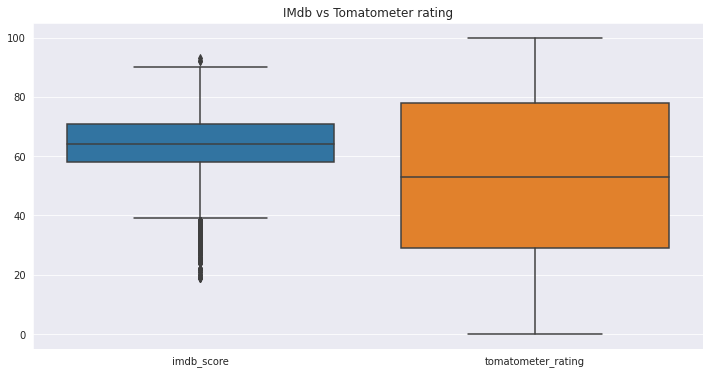

In [ ]:
plt.figure (figsize=(12,6))
sns.set_style('darkgrid')
plt.title ('IMdb vs Tomatometer rating')
sns.boxplot(data = imdb_rotten_genre_explode[['imdb_score','tomatometer_rating']] )

From the above two plots we can observe that the most of the IMDB score are in a narrow band of 60 - 70 while most of the rotten tomatoes score lie in a bigger band of 30 - 80.

This might be due to the fact that audiences usually rate most of the movies averagely with less strictness i.e. movies are not usually rated at extremes

but critics have a more strict rating criteria so despite many movies being rated average, many of the other movies are either rated very high or very low.

Let's also try and draw histograms for the above 2 variables.

We will be using following bin values for the histograms

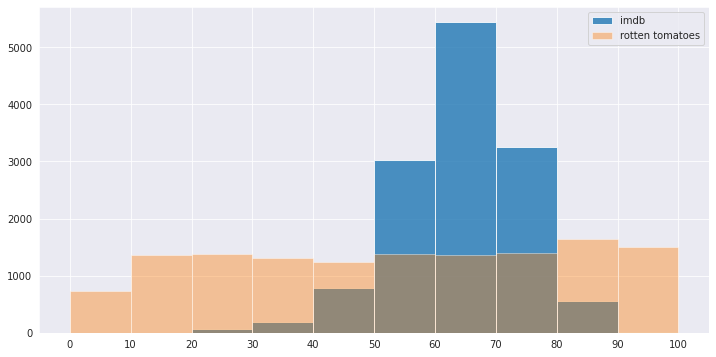

In [ ]:
bin_val = np.arange(0,101,10) # 0-10, 10-20, 20-30,.....90-100
plt.figure(figsize=(12,6))
plt.xticks(bin_val)
plt.hist(imdb_rotten_genre_explode.imdb_score,alpha=0.8,bins=bin_val)
plt.hist(imdb_rotten_genre_explode.tomatometer_rating,alpha=0.4,bins=bin_val)
plt.legend(['imdb','rotten tomatoes'])

Based on above 2 bar graphs we can clearly observe that imdb rating are mostly concentrated aroung the 50-70 range.

While tomatometer rating are very evenly distributed.

This also proves our initial assumption about the difference in rating behaviour of audience and critics.

Audiences usually rate most of the movies averagely with less strictness i.e. movies are not usually rated at extremes

but critics have a more strict rating criteria so despite many movies being rated average, many of the other movies are either rated very high or very low.

## Genre Vs Rating

In [ ]:
imdb_rotten_genre_explode

,movie_title,year,duration,country,language,director,production_company,actors,imdb_score,budget,worldwide_gross_income,tomatometer_rating,genre_list
0,The Kid,1921,68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",83.0,0.250,0.026916,100.0,Comedy
0,The Kid,1921,68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",83.0,0.250,0.026916,100.0,Drama
0,The Kid,1921,68,USA,"English, None",Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",83.0,0.250,0.026916,100.0,Family
1,A Woman of Paris: A Drama of Fate,1923,82,USA,"None, English",Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",70.0,0.351,0.011233,92.0,Drama
1,A Woman of Paris: A Drama of Fate,1923,82,USA,"None, English",Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",70.0,0.351,0.011233,92.0,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,Jexi,2019,84,"USA, Canada",English,"Jon Lucas, Scott Moore",CBS Films,"Adam Devine, Alexandra Shipp, Rose Byrne, Ron ...",61.0,5.000,9.341824,17.0,Comedy
5346,Jexi,2019,84,"USA, Canada",English,"Jon Lucas, Scott Moore",CBS Films,"Adam Devine, Alexandra Shipp, Rose Byrne, Ron ...",61.0,5.000,9.341824,17.0,Romance
5347,I Still Believe,2020,116,USA,English,"Andrew Erwin, Jon Erwin",Kevin Downes Productions,"K.J. Apa, Britt Robertson, Nathan Parsons, Gar...",65.0,12.000,13.681524,51.0,Biography
5347,I Still Believe,2020,116,USA,English,"Andrew Erwin, Jon Erwin",Kevin Downes Productions,"K.J. Apa, Britt Robertson, Nathan Parsons, Gar...",65.0,12.000,13.681524,51.0,Drama


In [ ]:
# find mean of genres
imdb_rotten_genre_mean =imdb_rotten_genre_explode.groupby('genre_list')['imdb_score', 'tomatometer_rating'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
imdb_rotten_genre_mean

,genre_list,imdb_score,tomatometer_rating
0,Action,61.884969,46.028374
1,Adventure,63.821000,54.227000
2,Animation,65.837945,63.648221
3,Biography,70.389685,67.481375
4,Comedy,61.452462,49.540712
5,Crime,64.065840,51.520038
6,Drama,66.375839,58.849739
7,Family,61.062323,50.407932
8,Fantasy,62.016432,47.373239
9,Film-Noir,79.100000,96.500000


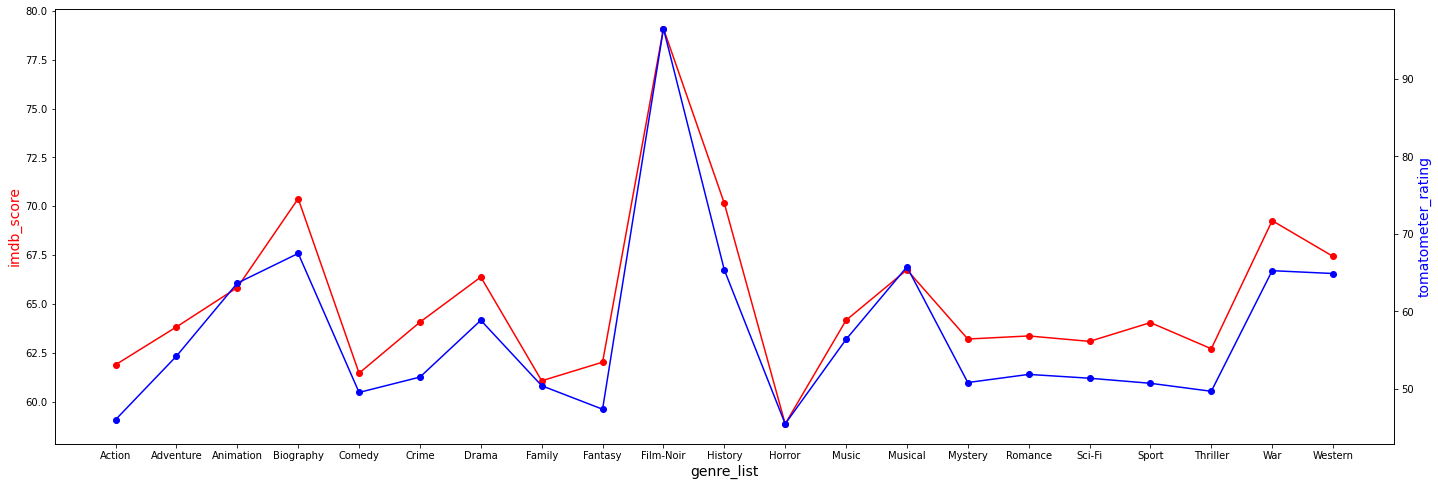

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(24,8))
# make a plot
ax.plot(imdb_rotten_genre_mean.genre_list, imdb_rotten_genre_mean.imdb_score, color="red", marker="o")
# set x-axis label
ax.set_xlabel("genre_list",fontsize=14)
# set y-axis label
ax.set_ylabel("imdb_score",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(imdb_rotten_genre_mean.genre_list, imdb_rotten_genre_mean["tomatometer_rating"],color="blue",marker="o")
ax2.set_ylabel("tomatometer_rating",color="blue",fontsize=14)
plt.show()

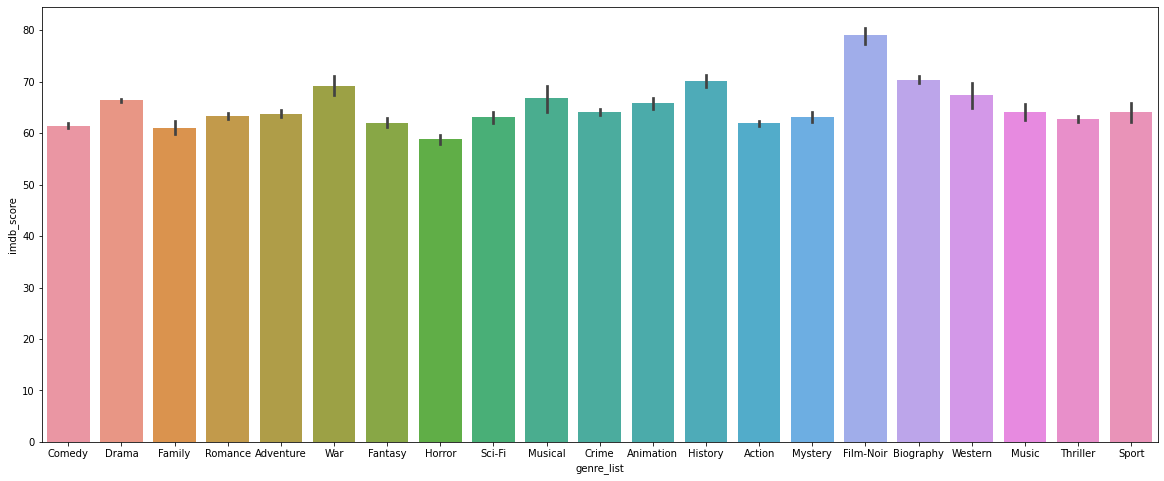

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='genre_list', y='imdb_score', data=imdb_rotten_genre_explode)
# sns.barplot(x='genre_list', y='tomatometer_rating', data=imdb_rotten_genre_mean)


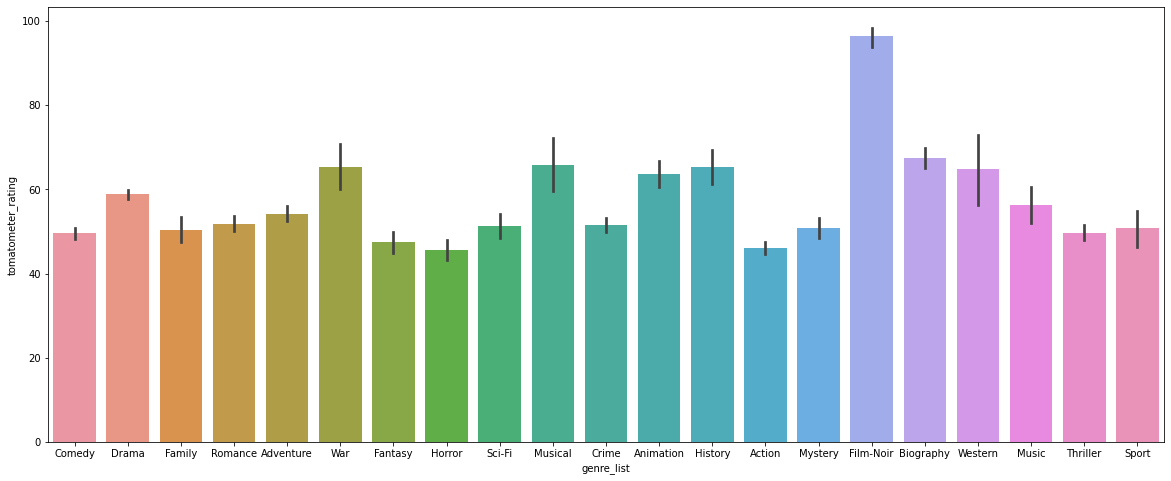

In [ ]:
plt.figure(figsize=(20,8))
# sns.barplot(x='genre_list', y='imdb_score', data=imdb_rotten_genre_mean)
sns.barplot(x='genre_list', y='tomatometer_rating', data=imdb_rotten_genre_explode)


Analysis Points

Based on the above 2 plots, we can clrealy following points about genre preference according to two rating systems:


film-noir genre is more preferred in both of the rating system
Some genres like Animation, War, Western are equally preferred in both rating system.

Overall it seems that in tomatometer rating(usually most of the genres are rated around 50) the genre are rated less than Imdb ratings(usually most of the genres are rated around 60).

A good differnce in rating can be observed for following genre (usually for these genres, imdb mean rating is higher than rotten tomato mean rating)

Action

Comedy

Crime

Family

Thriller

## Year Vs Rating

In [ ]:
# Groupby year and find the median of imdb_score and tomatometer_rating based on year
imdb_rotten_rating_year =imdb_rotten_genre_explode.groupby('year')['imdb_score', 'tomatometer_rating'].median().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
imdb_rotten_rating_year

,year,imdb_score,tomatometer_rating
0,1921,83.0,100.0
1,1923,70.0,92.0
2,1925,82.0,100.0
3,1927,75.0,93.0
4,1928,81.0,96.0
...,...,...,...
89,2016,63.0,54.0
90,2017,64.0,53.0
91,2018,63.0,60.0
92,2019,64.0,58.0


Plot Line graph with twinx feature of above data

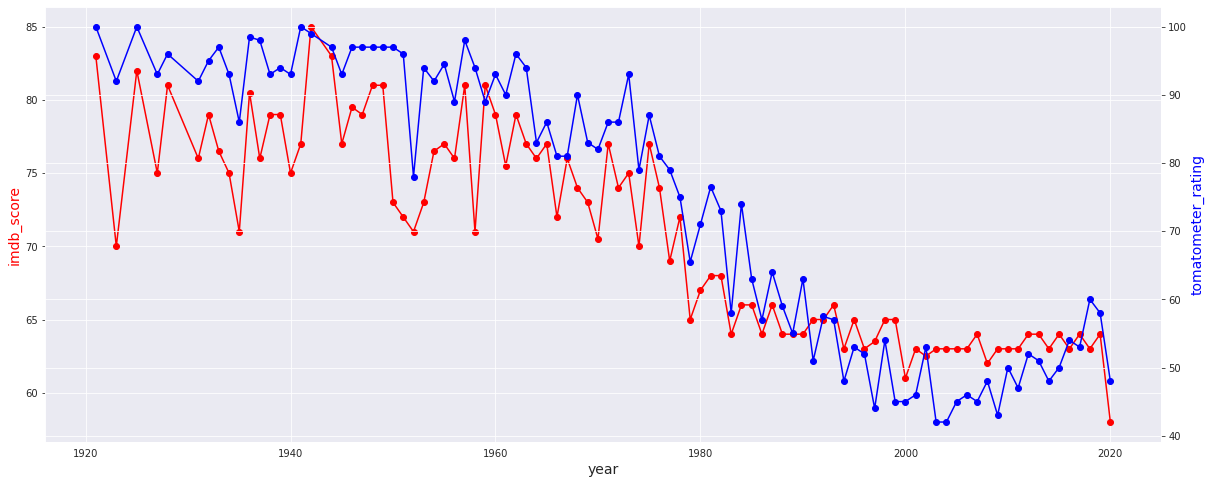

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20,8))
# make a plot
ax.plot(imdb_rotten_rating_year.year, imdb_rotten_rating_year.imdb_score, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("imdb_score",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(imdb_rotten_rating_year.year, imdb_rotten_rating_year["tomatometer_rating"],color="blue",marker="o")
ax2.set_ylabel("tomatometer_rating",color="blue",fontsize=14)
plt.show()

Also plot scatter graph of above data

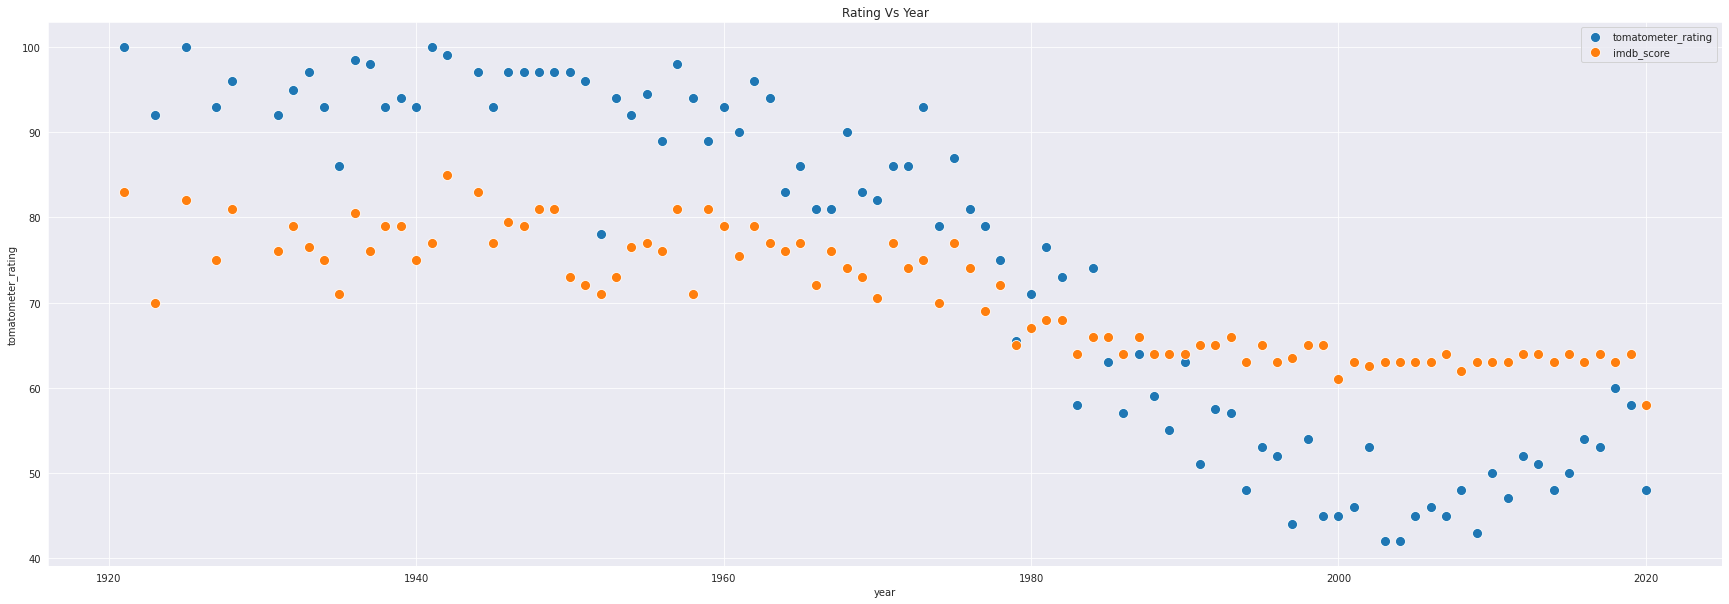

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Rating Vs Year')
sns.scatterplot(x=imdb_rotten_rating_year.year, y=imdb_rotten_rating_year.tomatometer_rating, s=100)
sns.scatterplot(x=imdb_rotten_rating_year.year, y=imdb_rotten_rating_year.imdb_score, s=100)
plt.legend(['tomatometer_rating','imdb_score'])

**Analysis Point**

1. As times goes on the tomatometer rating declined as compared to imdb_score  and vice versa.
2. The imdb_score almost constant after year 1980, which lies between in the range of 60 -70.
3. The tomatometer rating increses slightly after year 2000.  

## genre total movie count

In [ ]:
# Groupby the movies according to genre and count based on year 
imdb_rotten_year_movie_count =imdb_rotten_genre_explode.groupby('genre_list')['year'].count().reset_index()

In [ ]:
imdb_rotten_year_movie_count

,genre_list,year
0,Action,1304
1,Adventure,1000
2,Animation,253
3,Biography,349
4,Comedy,2051
5,Crime,1048
6,Drama,2682
7,Family,353
8,Fantasy,426
9,Film-Noir,10


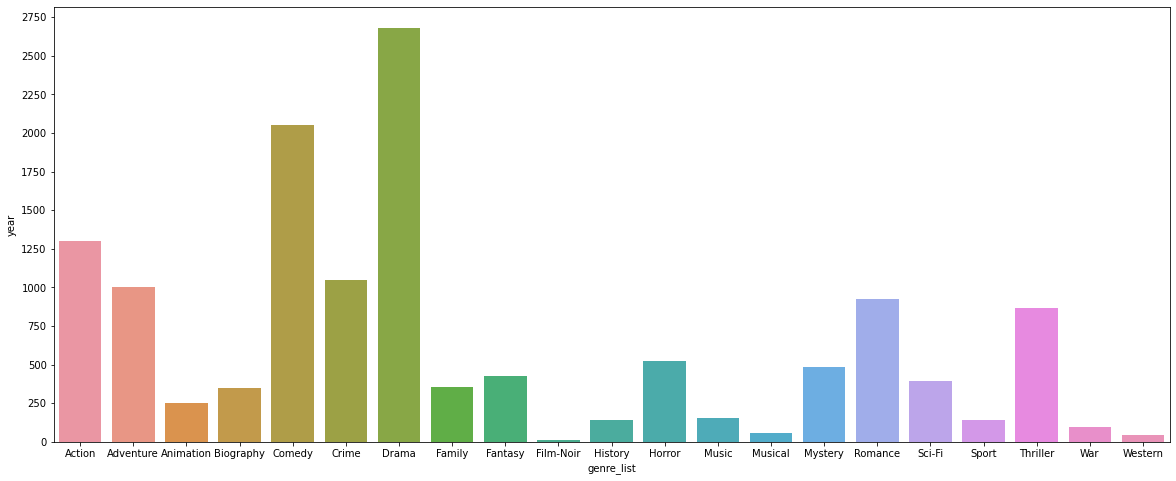

In [ ]:
plt.figure(figsize=(20,8))
plt.yticks(np.arange(0,3000,250))
sns.barplot(x='genre_list', y='year', data=imdb_rotten_year_movie_count);

**Analysis Point**

1. Throughout the data the Drama genre made mostly i.e. 2682 followed by comedy (2051) compared to others.
2. film noir movies are less made only 10 in counts

## genre_year_movie_count

In [ ]:
imdb_rotten_genre_explode.year.nunique()

94

In [ ]:
# create dataset with feature genre_list and year and grouby them on the count.
imdb_rotten_genre_year_movie_count = imdb_rotten_genre_year.groupby(['genre_list','year'])['imdb_score'].count().reset_index()

In [ ]:
imdb_rotten_genre_movie_count_year = imdb_rotten_genre_year_movie_count.groupby(['genre_list'])['year'].count().reset_index()

In [ ]:
imdb_rotten_genre_movie_count_year

,genre_list,year
0,Action,60
1,Adventure,74
2,Animation,49
3,Biography,56
4,Comedy,77
5,Crime,69
6,Drama,89
7,Family,63
8,Fantasy,54
9,Film-Noir,9


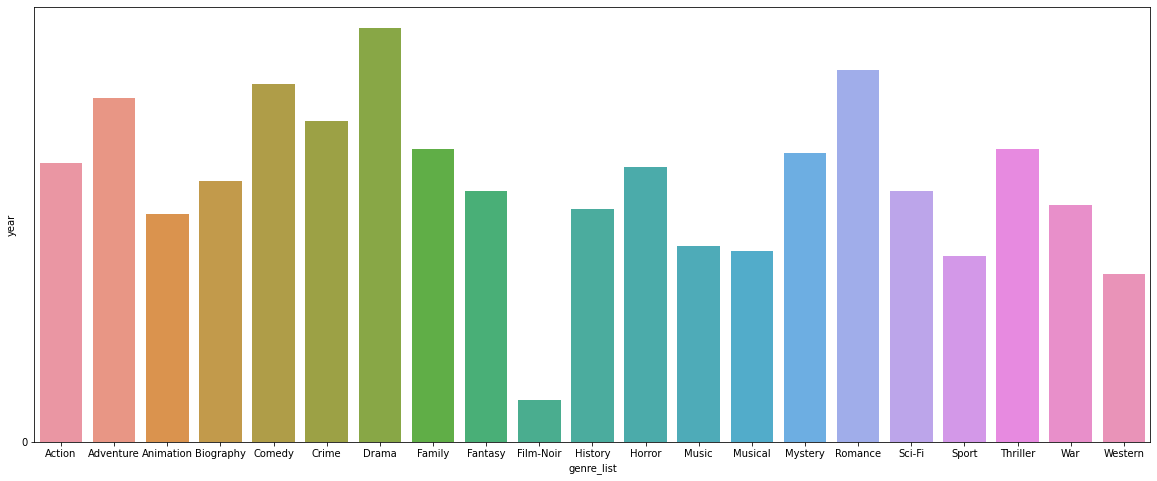

In [ ]:
plt.figure(figsize=(20,8))
plt.yticks(np.arange(0,3000,250))
sns.barplot(x='genre_list', y='year', data=imdb_rotten_genre_movie_count_year);

**Analysis Point**

1. Throughout 94 years drama genre movies released in 89 years followed by Romance (80) and comedy (77).
2. Film Noir is the least released in only 9 years.


## Year Budget Gross Income

In [ ]:
# create dataset with features 'year','budget','worldwide_gross_income'
yr_budget_income = imdb_rotten_genre_explode[['year','budget','worldwide_gross_income']]

In [ ]:
# drop duplicate rows
yr_budget_income.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
yr_budget_income

,year,budget,worldwide_gross_income
0,1921,0.250,0.026916
1,1923,0.351,0.011233
2,1925,0.923,0.026916
4,1927,0.200,0.121107
5,1927,2.000,0.000746
...,...,...,...
5343,2020,10.000,20.311536
5344,2020,3.000,10.691091
5345,2020,10.000,25.659965
5346,2019,5.000,9.341824


now draw the scatter plot for above dataset 

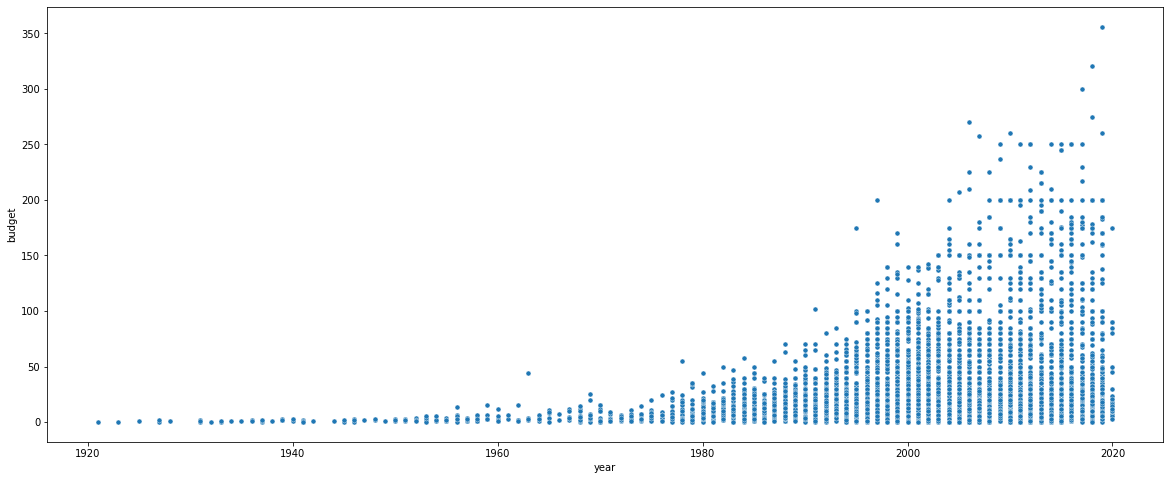

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='year', y='budget', data = yr_budget_income, s=25);


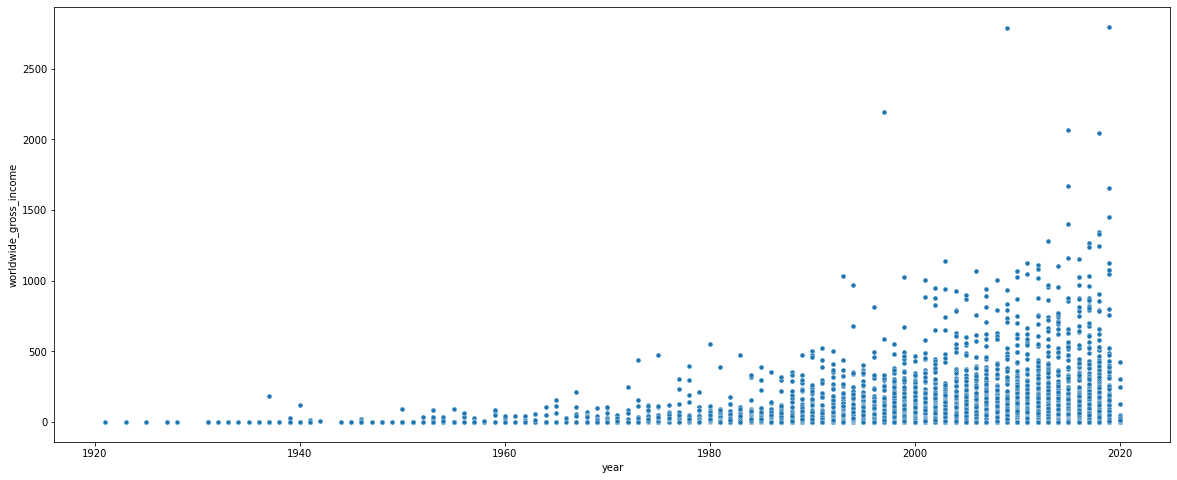

In [ ]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='year', y='worldwide_gross_income', data = yr_budget_income, s=25);

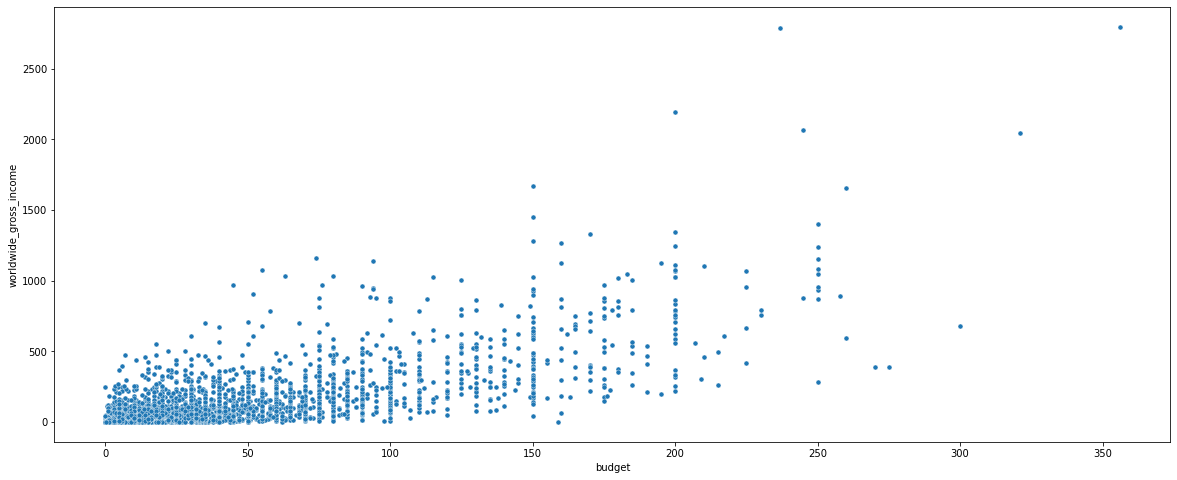

In [ ]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='budget', y='worldwide_gross_income', data = yr_budget_income, s=25);

**Analysis Point**

1. As we can see from above scatter plots, over the years the budget increases hence the gross income also increases.

Now plot correlation matrix between them

In [ ]:
correlation_yr_budget_income = yr_budget_income.corr()

In [ ]:
correlation_yr_budget_income

,year,budget,worldwide_gross_income
year,1.000000,0.281196,0.200861
budget,0.281196,1.000000,0.737768
worldwide_gross_income,0.200861,0.737768,1.000000


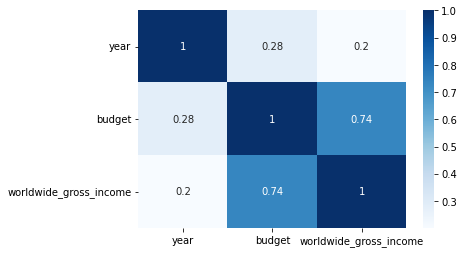

In [ ]:
sns.heatmap(correlation_yr_budget_income, annot=True, cmap='Blues')

**Analysis Point**

1. As we can see from above scatter plots, over the years the budget increases hence the gross income also increases.
2. And it is also seen from the correlation matrix that budget and gross income highly correlated with coefficient of 0.74 .

## Duration Rating

In [ ]:
# Create dataset for 'duration','imdb_score','tomatometer_rating'
duration_rating = imdb_rotten_genre_explode[['duration','imdb_score','tomatometer_rating']]
duration_rating

,duration,imdb_score,tomatometer_rating
0,68,83.0,100.0
0,68,83.0,100.0
0,68,83.0,100.0
1,82,70.0,92.0
1,82,70.0,92.0
...,...,...,...
5346,84,61.0,17.0
5346,84,61.0,17.0
5347,116,65.0,51.0
5347,116,65.0,51.0


In [ ]:
# Drop duplicate rows 
duration_rating.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Plot scatter graph for selected data for duration with tomatometer rating and imdb_score 

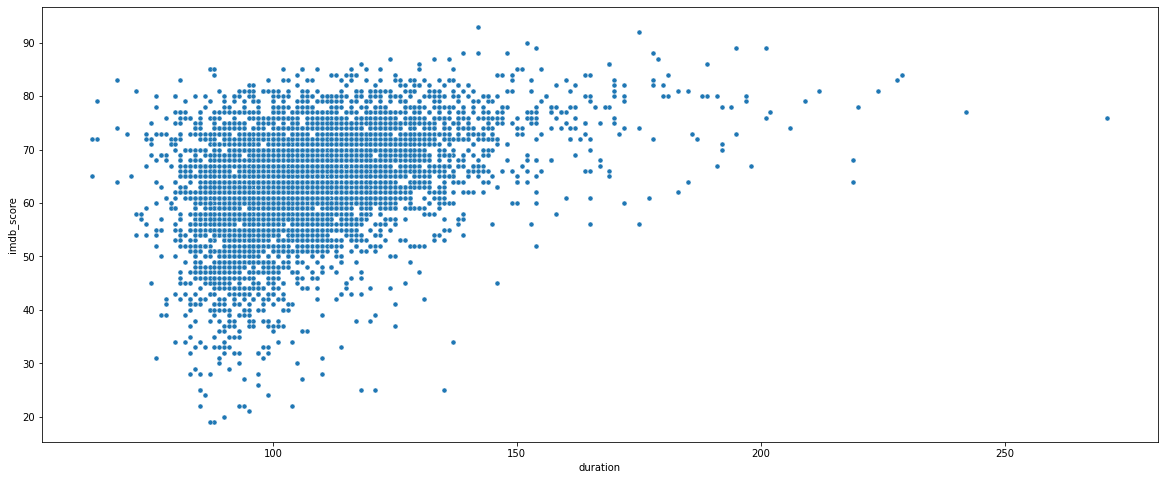

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='duration', y='imdb_score', data = duration_rating, s=25);

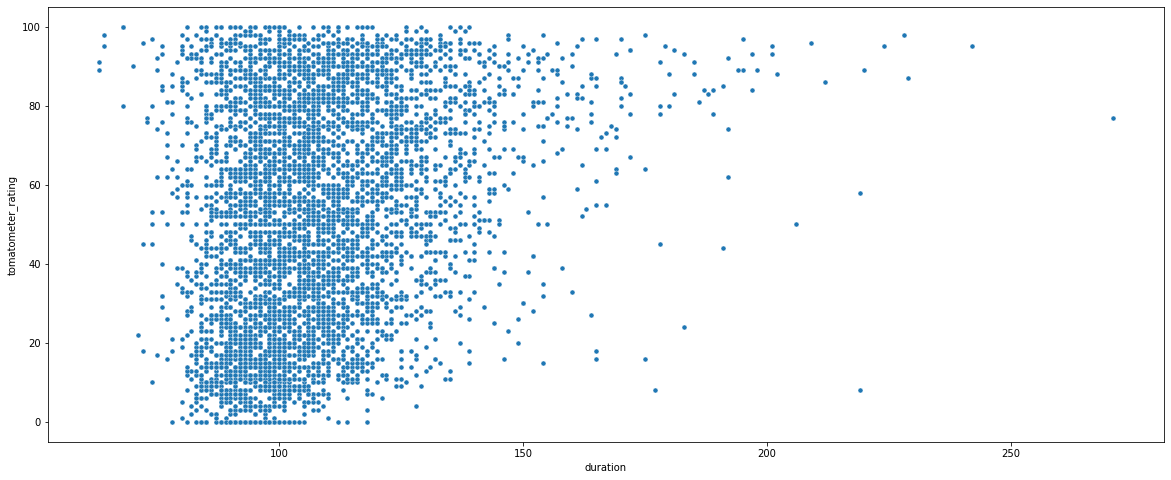

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='duration', y='tomatometer_rating', data = duration_rating, s=25);

Not such insight can drawn from above plots 
so let's see any insight can drawn by correlation between them.

In [ ]:
duration_rating_correlation = duration_rating.corr()

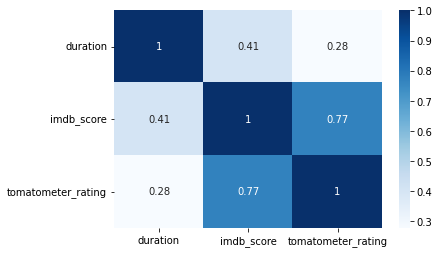

In [ ]:
sns.heatmap(duration_rating_correlation, annot=True, cmap='Blues')

**Analysis Point**

From correlation matrix it is observed that the duration is not highly correlated with imdb score and tomatometer rating

## Duration Income

In [ ]:
# Create dataset with features 'duration','worldwide_gross_income'
duration_income =imdb_rotten_genre_explode[['duration','worldwide_gross_income']]
duration_income.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Plot the scatter plot

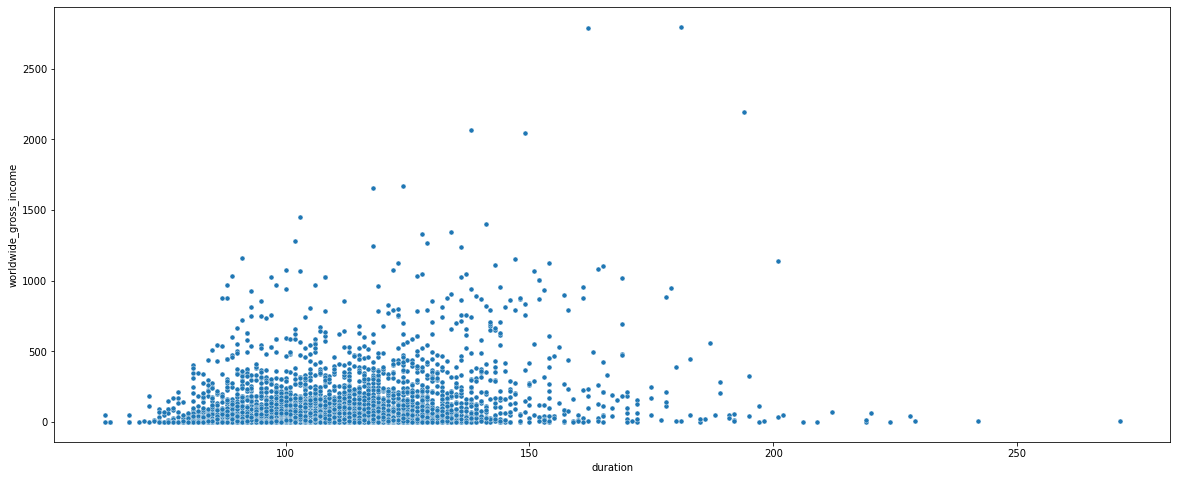

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='duration', y='worldwide_gross_income', data = duration_income, s=25);

## Duration Genre

In [ ]:
# Create dataframe with feature 'duration','genre_list', then remove duplicates rows
duration_genre = imdb_rotten_genre_explode[['duration','genre_list']]
duration_genre.drop_duplicates(inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
duration_genre

,duration,genre_list
0,68,Comedy
0,68,Drama
0,68,Family
1,82,Drama
1,82,Romance
...,...,...
5272,76,Horror
5303,169,Horror
5319,127,Horror
5340,148,Horror


Plot a box plot

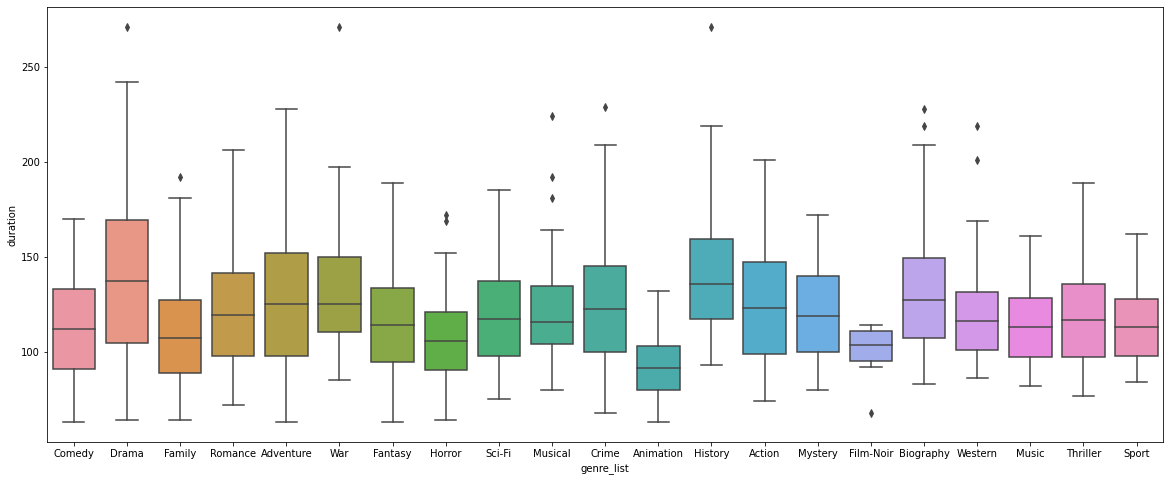

In [ ]:
plt.figure(figsize= (20,8))
sns.boxplot(x='genre_list', y='duration', data= duration_genre );

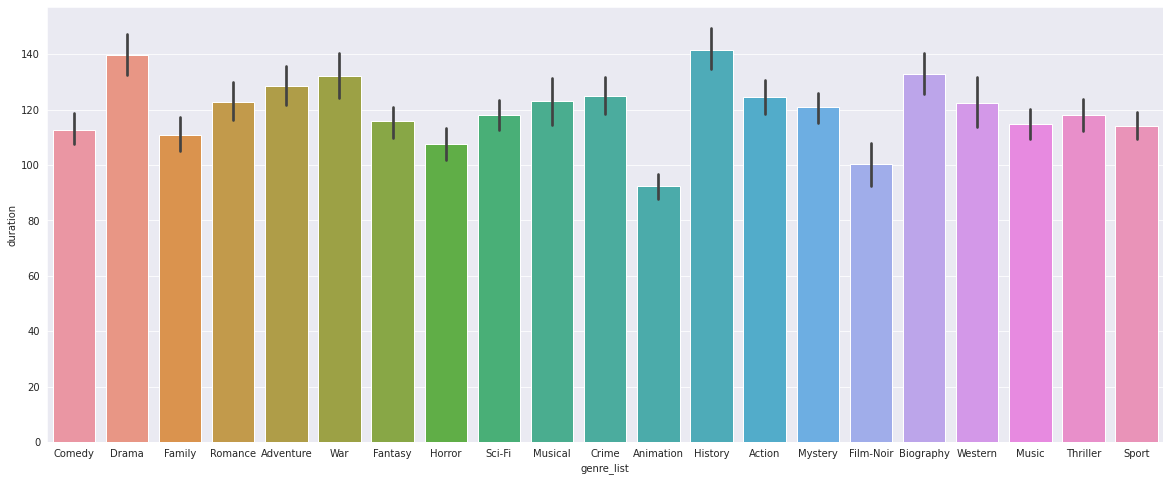

In [ ]:
plt.figure(figsize= (20,8))
sns.barplot(x='genre_list', y='duration', data= duration_genre );

**Analysis Point**

1. History and Drama genre movies are almost around 140 min, which is higher duration compared to other genres.
2. Animation genre movies has the lowest duration amongst other genres.

## Rating Language

In [ ]:
# create dataframe with selected column 'language','imdb_score','tomatometer_rating'
rating_language = imdb_rotten_genre_explode[['language','imdb_score','tomatometer_rating']]
# Drop Duplicates rows 
rating_language.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Explode the col language and remove duplicates rows
rating_language['language'] = rating_language.apply(lambda row:convert_list(row['language']),axis=1)
rating_language = rating_language.explode('language') 
rating_language.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Drop rows having language col none values
rating_language.drop(rating_language.loc[rating_language.language == 'None'].index, inplace=True)

In [ ]:
# Check the values of language col 
print(rating_language.language.unique())
print(rating_language.language.nunique())

['English' 'Hungarian' 'Latin' 'German' 'French' 'Italian' 'Russian'
 'Arabic' 'Esperanto' 'Spanish' 'Swahili' 'American Sign Language'
 'Japanese' 'Thai' 'Portuguese' 'Turkish' 'Welsh' 'Chinese'
 'Scottish Gaelic' 'Greek' 'Ancient (to 1453)' 'Yiddish' 'Hebrew'
 'Cantonese' 'Kurdish' 'Swedish' 'Irish' 'Navajo' 'Dutch' 'Polish' 'Hindi'
 'Vietnamese' 'Sindarin' 'Maltese' 'Romanian' 'Icelandic' 'Klingon'
 'Afrikaans' 'Ungwatsi' 'Serbo-Croatian' 'Ukrainian' 'Persian' 'Nepali'
 'Finnish' 'Filipino' 'Norwegian' 'Sinhalese' 'Khmer' 'Maori' 'Mandarin'
 'Guarani' 'Shanghainese' 'Czech' 'Slovak' 'Dari' 'Pushto'
 'Assyrian Neo-Aramaic' 'Spanish Sign Language' 'Korean'
 'Brazilian Sign Language' 'Lao' 'Aboriginal' 'Hawaiian'
 'North American Indian' 'Sioux' 'Inuktitut' 'British Sign Language'
 'Cornish' 'Xhosa' 'Zulu' 'Egyptian (Ancient)' 'Cree' 'Algonquin'
 'Serbian' 'Indonesian' 'Danish' 'Mende' 'Malay' 'Bosnian' 'Croatian'
 'Tibetan' 'Norse' 'Old' 'Tok Pisin' 'Albanian' 'Ojibwa' 'Washoe'
 'Papi

Their are 136 languages in which movies are released we can not plot all languages in one graph, so we have to restrict it for particular languages.

 So we have to select the 'English', 'Latin', 'German', 'French', 'Italian', 'Russian', 'Arabic', 'Spanish', 'Japanese', 'Chinese', 'Hindi', 'Korean' languages

In [ ]:
rating_language= rating_language.loc[rating_language.language.isin(['English', 'Latin', 'German', 'French', 'Italian', 'Russian', 'Arabic', 'Spanish', 'Japanese', 'Chinese', 'Hindi', 'Korean'])]

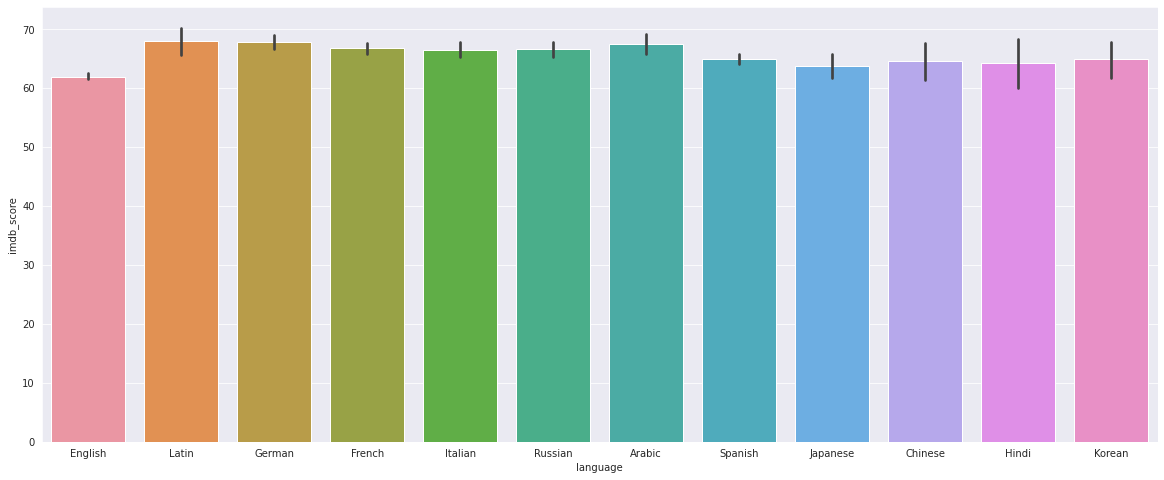

In [ ]:
plt.figure(figsize= (20,8))
sns.barplot(x='language', y='imdb_score',  data= rating_language );

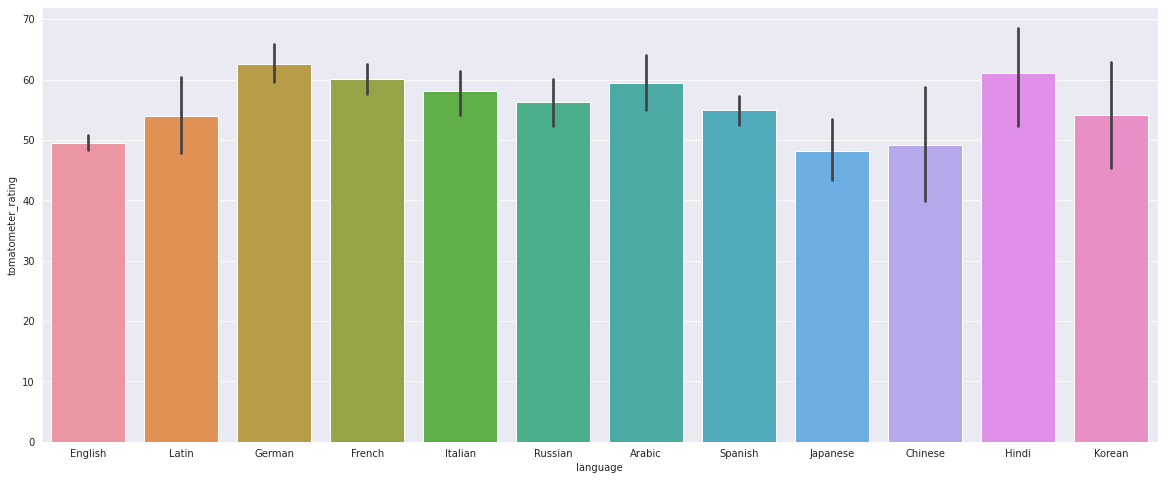

In [ ]:
plt.figure(figsize= (20,8))
sns.barplot(x='language', y='tomatometer_rating',  data= rating_language );

**Analysis Point**

1. Their is not such significant change in imdb score with languages but one insight is observed that English language has lowest rating as compared to other languages.
2. Their is much variation seen in the tomatometer rating as compared to imdb score with languages, in which German language has highest tomatometer rating followed by hindi while japanese has lowest tomatomete rating

## Genre Income

In [ ]:
# Create dataset with features imdb_rotten_genre_explode and remove duplicate rows
genre_income = imdb_rotten_genre_explode[['genre_list', 'worldwide_gross_income']].copy()
genre_income.drop_duplicates(inplace=True)

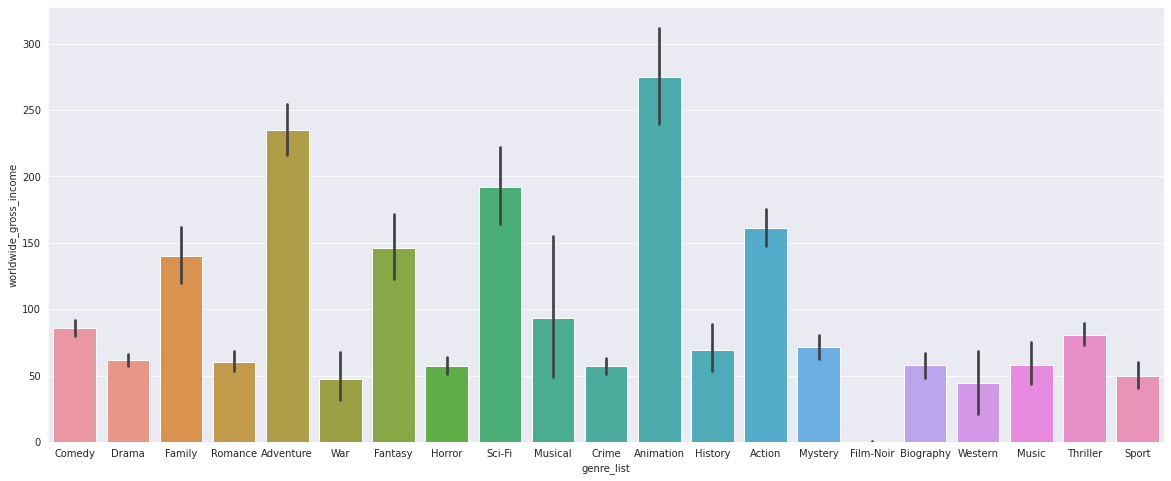

In [ ]:
# plot bar graph for above data
plt.figure(figsize=(20,8))
sns.barplot(x='genre_list', y='worldwide_gross_income', data=genre_income);

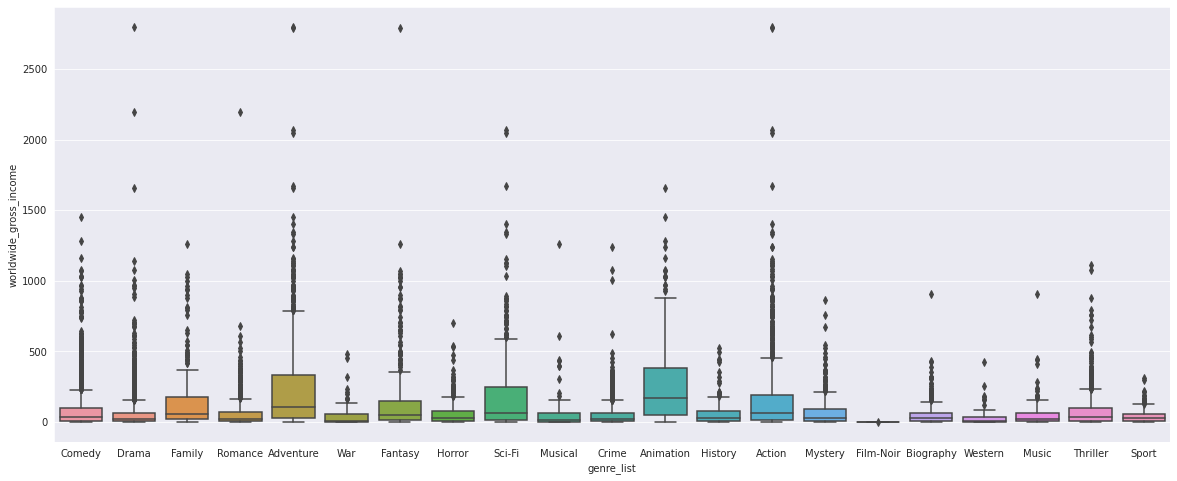

In [ ]:
# plot box graph for above data
plt.figure(figsize=(20,8))
sns.boxplot(x='genre_list', y='worldwide_gross_income', data=genre_income);

**Analysis point**

1. From the bar plot it is clearly observed that animation genre movies earned higher than other genres and also have less outliers as seen in box plot. 
2. After animation genre, the adventure movies have high world gross income but it has too much heavy outliers in it as seen in box plot.
3. Genre film-noir has the lowest earning, this is because this genre is obslette nowdays.

## Country Income

In [ ]:
# create dataset with feature 'country','worldwide_gross_income' then explode country col and drop duplicates
country_income= imdb_rotten_genre_explode[['country','worldwide_gross_income']].copy()
country_income['country'] = country_income.apply(lambda row:convert_list(row['country']),axis=1)
country_income = country_income.explode('country') 
country_income.drop_duplicates(inplace=True)

In [ ]:
# find the number of unique values in country
print(country_income.country.unique())
print(country_income.country.nunique())

['USA' 'France' 'Mexico' 'UK' 'Switzerland' 'Italy' 'Hong Kong' 'Ireland'
 'Canada' 'Soviet Union' 'Japan' 'Spain' 'West Germany' 'Australia'
 'Netherlands' 'South Africa' 'Botswana' 'India' 'New Zealand'
 'Czechoslovakia' 'Norway' 'Yugoslavia' 'Israel' 'Sweden' 'Germany'
 'Denmark' 'China' 'Taiwan' 'Argentina' 'Austria' 'Poland' 'Hungary'
 'Belgium' 'Federal Republic of Yugoslavia' 'Bulgaria' 'Czech Republic'
 'Romania' 'Morocco' 'Aruba' 'Luxembourg' 'South Korea' 'Jamaica'
 'Finland' 'Iceland' 'Malta' 'Isle Of Man' 'United Arab Emirates'
 'Uruguay' 'Brazil' 'Thailand' 'Turkey' 'Russia' 'Bahamas' 'Philippines'
 'Kenya' 'Colombia' 'Ecuador' 'Afghanistan' 'Cayman Islands' 'Palestine'
 'Croatia' 'Bosnia and Herzegovina' 'Slovakia' 'Tunisia' 'Slovenia'
 'Lithuania' 'Jordan' 'Ukraine' 'Saudi Arabia' 'Singapore' 'Guatemala'
 'Portugal' 'Serbia' 'Chile' 'Indonesia' 'Panama' 'Malaysia' 'Cambodia'
 'Puerto Rico' 'Greece' 'Monaco']
81


Since the number of country is 81 so we restricted it to selected countries'USA', 'France', 'Mexico', 'UK', 'Italy', 'Japan', 'Spain', 'Australia', 'South Africa', 'India', 'Germany', 'China','Russia'.

In [ ]:
country_income= country_income.loc[country_income.country.isin(['USA', 'France', 'Mexico', 'UK', 'Italy', 'Japan', 'Spain', 'Australia', 'South Africa', 'India', 'Germany', 'China','Russia'])]

Plot the bar plot and box plot 

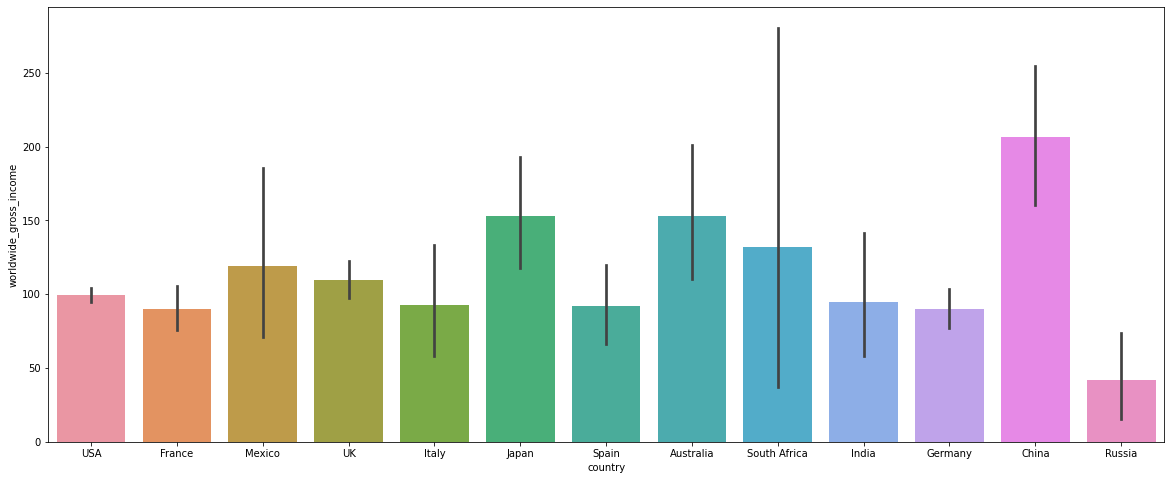

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='country', y='worldwide_gross_income', data=country_income);

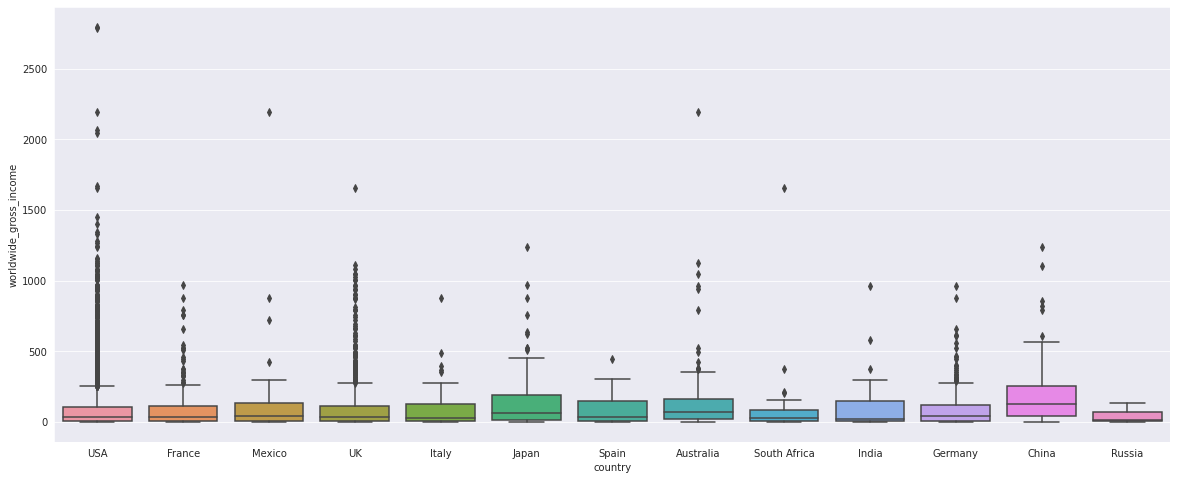

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='country', y='worldwide_gross_income', data=country_income);

**Analysis Point**

1. China has the highest gross income with some outliers followed by japan.
2. USA has the maximum outliers while russia has minimum outliers.

## Language Income

In [ ]:
# create dataset with feature 'language','worldwide_gross_income'
language_income = imdb_rotten_genre_explode[['language','worldwide_gross_income']].copy()

In [ ]:
language_income

,language,worldwide_gross_income
0,"English, None",0.026916
0,"English, None",0.026916
0,"English, None",0.026916
1,"None, English",0.011233
1,"None, English",0.011233
...,...,...
5346,English,9.341824
5346,English,9.341824
5347,English,13.681524
5347,English,13.681524


In [ ]:
# Convert the languages to list
language_income['language'] = language_income.apply(lambda row:convert_list(row['language']),axis=1)

In [ ]:
# Explode the languages and drop duplicates
language_income = language_income.explode('language') 
language_income.drop_duplicates(inplace=True)


As the number of languages are more so we have to restrict it with selected languages 'English', 'Latin', 'German', 'French', 'Italian', 'Russian', 'Arabic', 'Spanish', 'Japanese', 'Chinese', 'Hindi', 'Korean'

In [ ]:
language_income= language_income.loc[language_income.language.isin(['English', 'Latin', 'German', 'French', 'Italian', 'Russian', 'Arabic', 'Spanish', 'Japanese', 'Chinese', 'Hindi', 'Korean'])]

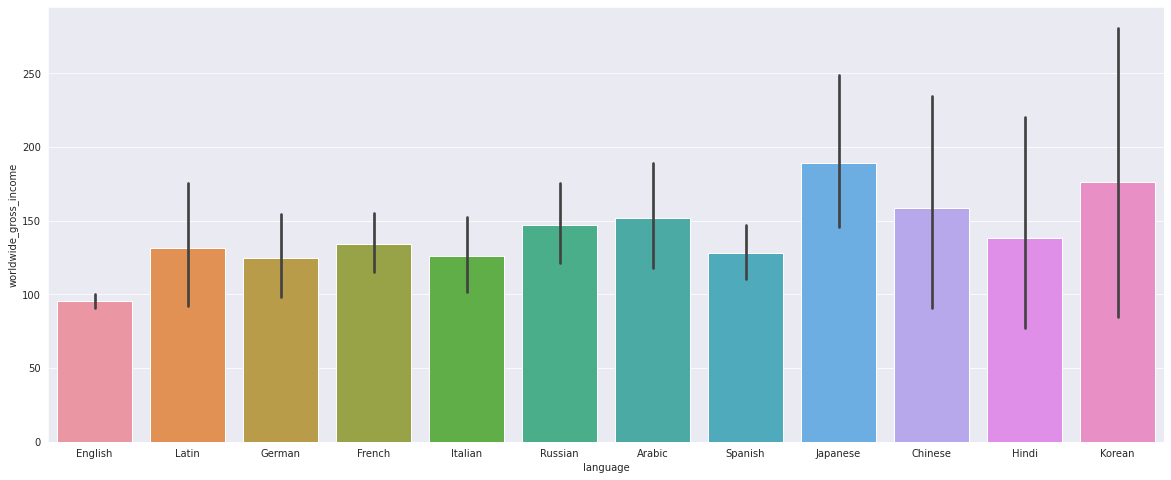

In [ ]:
# plot the barplot for selected languages
plt.figure(figsize=(20,8))
sns.barplot(x='language', y='worldwide_gross_income', data=language_income);

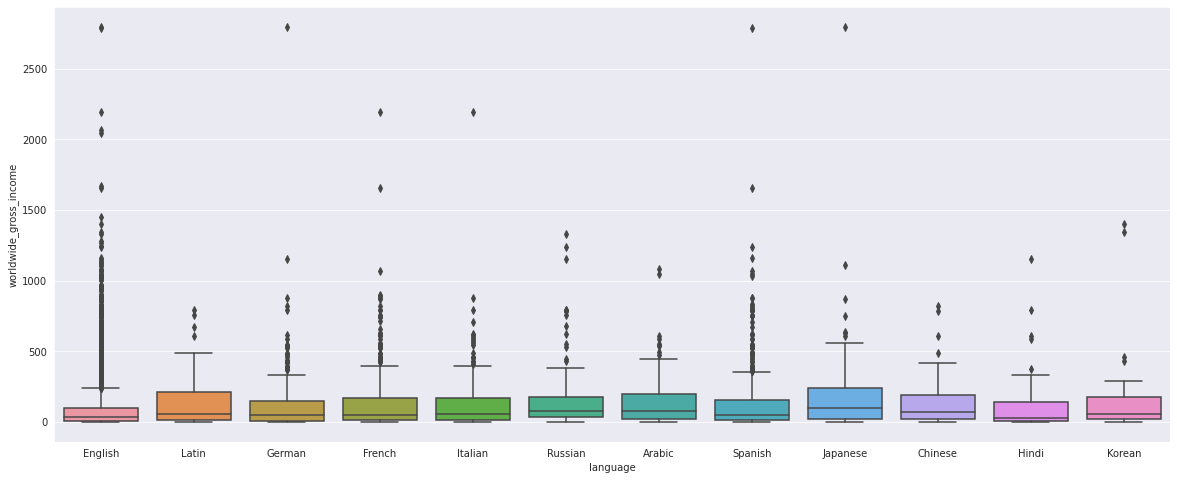

In [ ]:
# plot the boxplot for selected languages
plt.figure(figsize=(20,8))
sns.boxplot(x='language', y='worldwide_gross_income', data=language_income);

**Analysis Point**

1. It is seen that the earnings are more in japanese languages it also have some heavy outliers followed by the korean languages with less outliers.
2. while the earning in english is lowest as compared to other selected languages with too much outliers.

# Final Results

1. We can observe that the most of the IMDB score are in a narrow band of 60 - 70 while most of the rotten tomatoes score lie in a bigger band of 30 - 80.

    This might be due to the fact that audiences usually rate most of the movies averagely with less strictness i.e. movies are not usually rated at extremes

    but critics have a more strict rating criteria so despite many movies being rated average, many of the other movies are either rated very high or very low.

2. Film-noir genre is more preferred in both of the rating system Some genres like Animation, War, Western are equally preferred in both rating system.

3. As times goes on the tomatometer rating declined as compared to imdb_score and vice versa.

4. English language has lowest rating as compared to other languages in both imdb and rottrn tomatoes.

5. The duration is not highly correlated with imdb score and tomatometer rating.

6. Animation genre movies earned higher than other genres.

7. Movies released in japanese language earns more as released in other languages.

8. China has the highest gross income as compared to other countries.

9. History and Drama genre movies are almost around 140 min, which is higher duration compared to other genres.
Animation genre movies has the lowest duration amongst other genres.

10. Throughout years the Drama genre movies are released most i.e. 2682 followed by comedy (2051) compared to others..Throughout 94 years drama genre movies released in 89 years followed by Romance (80) and comedy (77).

11. Over the years the budget increases hence the gross income also increases.
And it is also seen from the correlation matrix that budget and gross income highly correlated with coefficient of 0.74 .
 